In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load and Subset Data

<Item title:"Pond_Management" type:Feature Layer Collection owner:Anooshi>
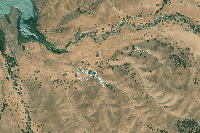

In [4]:
# Load data from arcGIS online
output = arcGIS_data_load('da4f77fa97734af2a50a510b7a4473c4')

data = output['data0']
feature_service = output['feature_service']

In [5]:
# Subset data for desired year.
data.rename(columns={"DateTreat": "Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY)2018
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 55


# QAQC

In [5]:
QAQC_whitespace(data, exclude_cols=['TreatNotes'])

Name of Object ID Column:  ['OBJECTID_1']


Analysis for: GlobalID_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Herbicide
No \xa0 characters found
No double spaces found
No triple spaces found
Trailing white space found


,OBJECTID_1,Herbicide
34,35,
35,36,
36,37,
37,38,
38,39,
39,40,
40,41,
41,42,
44,45,
45,46,




Analysis for: Surveyor1
No \xa0 characters found
No double spaces found
No triple spaces found
Trailing white space found


,OBJECTID_1,Surveyor1
64,69,
145,150,
147,153,
149,156,
150,157,
152,159,
153,160,
154,161,
160,169,
161,170,




Analysis for: PlantSpecies
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Contractor
No \xa0 characters found
No double spaces found
No triple spaces found
Trailing white space found


,OBJECTID_1,Contractor
35,36,
36,37,
37,38,
38,39,
39,40,
40,41,
41,42,
60,63,
62,65,
64,69,




Analysis for: TreatType
No \xa0 characters found
No double spaces found
No triple spaces found
Trailing white space found


In [26]:
QAQC_plot(sub, ['BHR_Site', 'CompType', 'Contractor', 'Date', 'Habitat',
       'Herbicide', 'PatchSize', 'PctCover',
       'Phenology', 'PlantSpecies', 'Surveyor1', 'Surveyor2',
       'TreatType',])

In [27]:
foo = find_outlier(sub, ['PatchSize', 'PctCover'])

PatchSize  Outlier: True
See Outlier Entries Below:


ipynb.fs.full.ATS_Functions:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
compare_years_continuous(data, 'PatchSize', '2017','2018',4000)

In [29]:
compare_years_continuous(data, 'PctCover', '2017','2018',10)

In [31]:
compare_years_catagorical(data,['BHR_Site', 'CompType', 'Contractor', 'Habitat',
       'Herbicide', 'Phenology', 'PlantSpecies', 'Surveyor1', 'Surveyor2',
       'TreatType', ], '2017','2018')

In [32]:
sub2017 = year_subset(data,'2017')
compare_surveyors(sub2017, 'PlantSpecies','Surveyor1',5)

Analysis for 2017-10-01 07:00 UTC to 2018-10-01 07:00 UTC
Entries in Subset: 659
Dropping surveyors with less than 32.95 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Marina Olson' 'Russell Huddleston' 'Ryan Swanson']


In [33]:
compare_surveyors(sub, 'PlantSpecies','Surveyor1',5)

Dropping surveyors with less than 37.15 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Janel Mayo' 'Rusty Hutto' 'Rachel McCracken' 'Russell Huddleston'
 'Roger Stephens']


# Analysis

In [4]:
# Cal IPC rating: TODO
pltDir = r"G:\Scripts_Toolboxes\Annual_Report\Script Support Files\SAC Master Plant Species List 20191014.xlsx"
pltSheet = "Year 5 Plant Species List"

verif = input("Current Plant Species List file location:\n"+pltDir+"\nCurrent Sheet Name:\n"+pltSheet+"\n\nIs this correct? (Y/N)")

if verif=="Y":
    # Will need to update this file locally on the public drive and change the sheet name
    pltLst = pd.read_excel(pltDir, pltSheet)

    rating_dict = pltLst.set_index('Species')['Cal-IPC Rating'].to_dict()
    data['Cal_IPC'] = (data['PlantSpecies'].replace(rating_dict))
    
    
else:
    print("\nChange directory and sheet in code")

Current Plant Species List file location:
G:\Scripts_Toolboxes\Annual_Report\Script Support Files\SAC Master Plant Species List 20191014.xlsx
Current Sheet Name:
Year 5 Plant Species List

Is this correct? (Y/N)Y


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Scripts_Toolboxes\\Annual_Report\\Script Support Files\\SAC Master Plant Species List 20191014.xlsx'

In [6]:
#Patch Count
patch_count = sub.groupby(['CompType','Habitat','PlantSpecies']).Patch_ID.nunique()
patch_count = patch_count.rename('Patch Count')

#Mean area of patches
ps_patch_mean = sub.groupby(['CompType','Habitat','PlantSpecies','Patch_ID']).PatchSize.mean() #take mean of all records for a given patch
ps_mean = ps_patch_mean.groupby(['CompType','Habitat','PlantSpecies']).mean() #mean of species's patches
ps_mean = ps_mean.rename('Mean Patch Area')


In [7]:

ps_min = sub.groupby(['CompType','Habitat','PlantSpecies']).PatchSize.min()
ps_min = ps_min.rename('Min Patch Area')
ps_max = sub.groupby(['CompType','Habitat','PlantSpecies']).PatchSize.max()
ps_max = ps_max.rename('Max Patch Area')


ps_sum = ps_patch_mean.groupby(['CompType','Habitat','PlantSpecies']).sum()
ps_sum = ps_sum.rename('Total Patch Area')

# % Cover
pc_patch_mean = sub.groupby(['CompType','Habitat','PlantSpecies','Patch_ID']).PctCover.mean()
pc_mean = pc_patch_mean.groupby(['CompType','Habitat','PlantSpecies']).mean().round()
pc_mean = pc_mean.rename('Mean % Cover')
pc_mean

pc_min = sub.groupby(['CompType','Habitat','PlantSpecies']).PctCover.min()
pc_min = pc_min.rename('Min % Cover')
pc_max = sub.groupby(['CompType','Habitat','PlantSpecies']).PctCover.max()
pc_max = pc_max.rename('Max % Cover')

#Treatments
treatments = sub.groupby(['CompType','Habitat','PlantSpecies']).TreatType.unique()

In [8]:
#Combine into one dataframe
df_3 = pd.concat([patch_count, ps_mean, ps_sum, ps_min, ps_max, pc_mean, pc_min, pc_max, treatments], axis=1)

In [9]:
df_3

Patch Count  \
CompType       Habitat              PlantSpecies                         
Enhancement    Non-native Grassland Dittrichia graveolens           23   
               Oak Savannah         Dittrichia graveolens            1   
               Open Water           Dittrichia graveolens            1   
               Potential Stream     Dittrichia graveolens            2   
               Seasonal Wetland     Dittrichia graveolens           13   
               Willow Riparian      Dittrichia graveolens            1   
Not Applicable Developed            Dittrichia graveolens            1   

                                                           Mean Patch Area  \
CompType       Habitat              PlantSpecies                             
Enhancement    Non-native Grassland Dittrichia graveolens         1871.064   
               Oak Savannah         Dittrichia graveolens         1614.600   
               Open Water           Dittrichia graveolens         1614.600   
               Potential Stream     Dittrichia graveolens         2421.900   
               Seasonal Wetland     Dittrichia graveolens         1460.592   
               Willow Riparian      Dittrichia graveolens          538.200   
Not Applicable Developed            Dittrichia graveolens          538.200   

                                                           Total Patch Area  \
CompType       Habitat              PlantSpecies                              
Enhancement    Non-native Grassland Dittrichia graveolens         43034.472   
               Oak Savannah         Dittrichia graveolens          1614.600   
               Open Water           Dittrichia graveolens          1614.600   
               Potential Stream     Dittrichia graveolens          4843.800   
               Seasonal Wetland     Dittrichia graveolens         18987.696   
               Willow Riparian      Dittrichia graveolens           538.200   
Not Applicable Developed            Dittrichia graveolens           538.200   

                                                           Min Patch Area  \
CompType       Habitat              PlantSpecies                            
Enhancement    Non-native Grassland Dittrichia graveolens         172.224   
               Oak Savannah         Dittrichia graveolens        1614.600   
               Open Water           Dittrichia graveolens        1614.600   
               Potential Stream     Dittrichia graveolens         538.200   
               Seasonal Wetland     Dittrichia graveolens         107.640   
               Willow Riparian      Dittrichia graveolens         538.200   
Not Applicable Developed            Dittrichia graveolens         538.200   

                                                           Max Patch Area  \
CompType       Habitat              PlantSpecies                            
Enhancement    Non-native Grassland Dittrichia graveolens          5382.0   
               Oak Savannah         Dittrichia graveolens          1614.6   
               Open Water           Dittrichia graveolens          1614.6   
               Potential Stream     Dittrichia graveolens          4305.6   
               Seasonal Wetland     Dittrichia graveolens          3767.4   
               Willow Riparian      Dittrichia graveolens           538.2   
Not Applicable Developed            Dittrichia graveolens           538.2   

                                                           Mean % Cover  \
CompType       Habitat              PlantSpecies                          
Enhancement    Non-native Grassland Dittrichia graveolens          11.0   
               Oak Savannah         Dittrichia graveolens          10.0   
               Open Water           Dittrichia graveolens           2.0   
               Potential Stream     Dittrichia graveolens           4.0   
               Seasonal Wetland     Dittrichia graveolens          20.0   
               Willow Riparian      Dittrichia graveolens       

In [12]:
TOTdigr = df_3['Mean Patch Area'].sum()
TOTdigr

10059.155999999999

In [7]:
df_3.to_excel(r"C:\Users\RHutto\Downloads\output.xlsx")

# Export Data Deliverable

In [40]:
data.columns


Index(['BHR_Site', 'CompType', 'Contractor', 'Date', 'GlobalID_2', 'Habitat',
       'Herbicide', 'OBJECTID_1', 'PatchSize', 'PctCover', 'Phenology',
       'PlantSpecies', 'SHAPE', 'Surveyor1', 'Surveyor2', 'TreatNotes',
       'TreatType'],
      dtype='object')

In [17]:
field_order = [
    'BHR_Site',
    'Date',
    'Surveyor1', 
    'Surveyor2',
    'Habitat',
    'Phenology',
    'TreatType',
    'Herbicide',
    'Contractor',
    'PctCover',
    'PatchSize',
    'CompType', 
    'PlantSpecies', 
    'TreatNotes', 
    'OBJECTID_1', 
    'GlobalID_2',
    'SHAPE', 
]

In [18]:
export_data_deliverable(data, feature_service, field_order)

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_Management_Action_Tracking_Data_20191122.xlsx
